In [2]:
#problem1
import pandas as pd

# 1-Loading bank dataset
df = pd.read_csv('/content/drive/MyDrive/CTA/Datasets/Copy_of_bank .csv')

# 2Checking info and identifying object columns
df.info()
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"{col} unique values: {df[col].unique()}")

# 3 Dropping object columns and saving to CSV
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.to_csv('banknumericdata.csv', index=False)

# 4Reading new CSV and showing stats
df_numeric = pd.read_csv('banknumericdata.csv')
print(df_numeric.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
job unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'ad

In [7]:
#Problem 2----
medicalData = pd.read_csv('/content/drive/MyDrive/CTA/Datasets/Copy of medical_students_dataset.csv')
medicalData.info()

# Filling missing values
medicalData['Age'] = medicalData['Age'].fillna(medicalData['Age'].mean())
medicalData['Gender'] = medicalData['Gender'].fillna(medicalData['Gender'].mode()[0])

# Removing duplicates
medicalData = medicalData.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [17]:
#titanic dataset
#probelm1

import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/CTA/Datasets/Copy of Titanic-Dataset.csv')

# Subset the DataFrame for the required columns and first-class passengers
df_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df_first_class = df_subset[df_subset['Pclass'] == 1]

# Calculate mean, median, max, and min of the 'Fare' column
mean_fare = df_first_class['Fare'].mean()
median_fare = df_first_class['Fare'].median()
max_fare = df_first_class['Fare'].max()
min_fare = df_first_class['Fare'].min()

# Output the results
mean_fare, median_fare, max_fare, min_fare



(84.1546875, 60.287499999999994, 512.3292, 0.0)

In [18]:
#probelm2 checking nukl value for age
null_age_count = df_first_class['Age'].isnull().sum()

# Drop rows with null values in the 'Age' column
df_first_class_cleaned = df_first_class.dropna(subset=['Age'])

# Output the result of null count and the cleaned DataFrame
null_age_count, df_first_class_cleaned.head()


(30,
                                                  Name  Pclass     Sex   Age  \
 1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
 3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
 6                             McCarthy, Mr. Timothy J       1    male  54.0   
 11                           Bonnell, Miss. Elizabeth       1  female  58.0   
 23                       Sloper, Mr. William Thompson       1    male  28.0   
 
        Fare  Survived  
 1   71.2833         1  
 3   53.1000         1  
 6   51.8625         0  
 11  26.5500         1  
 23  35.5000         1  )

In [19]:
#problem3 and one hotendcoding for embarked
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add the new columns to the DataFrame
df_with_dummies = pd.concat([df, embarked_dummies], axis=1)

# Drop the original 'Embarked' column
df_with_dummies = df_with_dummies.drop(columns=['Embarked'])

# Output the first few rows to verify changes
df_with_dummies.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


<ipython-input-20-8fe02d2e66f1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='Set2')


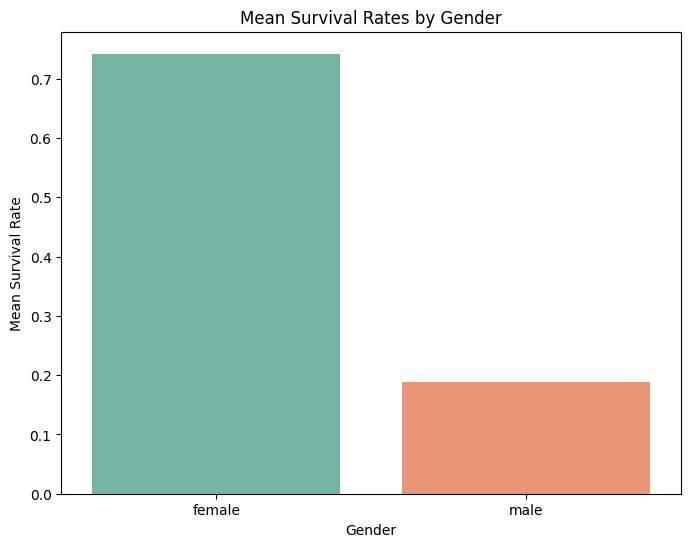

In [20]:
#probelm 4
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Sex' and calculate the mean survival rate
survival_by_gender = df.groupby('Sex')['Survived'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='Set2')
plt.title('Mean Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()


<ipython-input-21-4d8992273d3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_embarkation.index, y=survival_by_embarkation.values, palette='Set1')


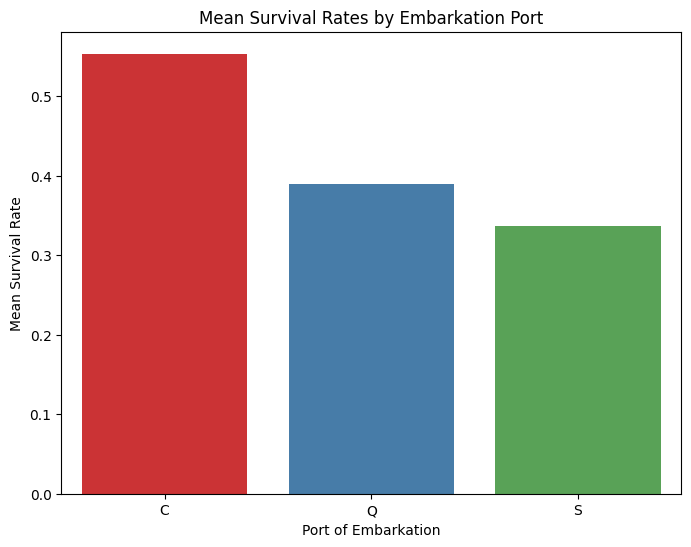

In [21]:
#prob;lem 5
#GroupBY embarked abnd calcukate sruvival
survival_by_embarkation = df.groupby('Embarked')['Survived'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_embarkation.index, y=survival_by_embarkation.values, palette='Set1')
plt.title('Mean Survival Rates by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.show()
